In [25]:
# import libraries
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [26]:

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contrastive Learning/IMDB Dataset english.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [27]:
train_df = train_df[10000:]
train_df.shape

(40000, 2)

In [28]:
# load the data
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contrastive Learning/imdb_eng_tests.csv')
# data shape
print(test_df.shape)
test_df.head()

(10000, 3)


,Unnamed: 0,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
test_df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [30]:
train_df['Class_Numeric'] = train_df['sentiment'].replace(['positive', 'negative'], [0,1])
test_df['Class_Numeric'] = test_df['sentiment'].replace(['positive', 'negative'], [0,1])

In [31]:
train_df.review=train_df.review.astype(str)
test_df.review=test_df.review.astype(str)

In [32]:
# tokenize training data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 200
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['review'])
sequences = tokenizer.texts_to_sequences(train_df['review'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
train_data = pad_sequences(sequences, maxlen=maxlen)
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_labels = to_one_hot(train_df['Class_Numeric'])
labels = np.asarray(one_hot_labels)
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

X_train = train_data[indices]
y_train = labels[indices]

Found 112127 unique tokens.
Shape of data tensor: (40000, 200)
Shape of label tensor: (40000, 2)


In [33]:
# test data
test_sequences = tokenizer.texts_to_sequences(test_df['review'])
X_test = pad_sequences(test_sequences, maxlen=maxlen)
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_labels = to_one_hot(test_df['Class_Numeric'])
y_test = np.asarray(one_hot_labels)
print('Shape of data tensor:', X_test.shape)
print('Shape of label tensor:', y_test.shape)

Shape of data tensor: (10000, 200)
Shape of label tensor: (10000, 2)


In [34]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Embedding, LSTM,  Bidirectional
from keras import regularizers


model = Sequential()
model.add(Embedding(509963, 64))
model.add(Bidirectional(LSTM(32,dropout=0.2,
recurrent_dropout=0.2)))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          32637632  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 32,662,594
Trainable params: 32,662,594
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(X_train, y_train,
epochs=10,
batch_size=64)

Epoch 1/10
625/625 [==============================] - 430s 682ms/step - loss: 0.4762 - acc: 0.7449
Epoch 2/10
625/625 [==============================] - 424s 679ms/step - loss: 0.2187 - acc: 0.9150
Epoch 3/10
625/625 [==============================] - 418s 669ms/step - loss: 0.1748 - acc: 0.9355
Epoch 4/10
625/625 [==============================] - 419s 671ms/step - loss: 0.1370 - acc: 0.9493
Epoch 5/10
625/625 [==============================] - 425s 681ms/step - loss: 0.1147 - acc: 0.9580
Epoch 6/10
625/625 [==============================] - 419s 671ms/step - loss: 0.0890 - acc: 0.9694
Epoch 7/10
625/625 [==============================] - 418s 669ms/step - loss: 0.0704 - acc: 0.9756
Epoch 8/10
625/625 [==============================] - 415s 665ms/step - loss: 0.0643 - acc: 0.9783
Epoch 9/10
625/625 [==============================] - 416s 666ms/step - loss: 0.0419 - acc: 0.9865
Epoch 10/10
625/625 [==============================] - 417s 668ms/step - loss: 0.0395 - acc: 0.9873


In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 36ms/step - loss: 0.5222 - acc: 0.8736


[0.5222089886665344, 0.8736000061035156]

In [37]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      5028
           1       0.88      0.86      0.87      4972

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



[[4470  558]
 [ 706 4266]]


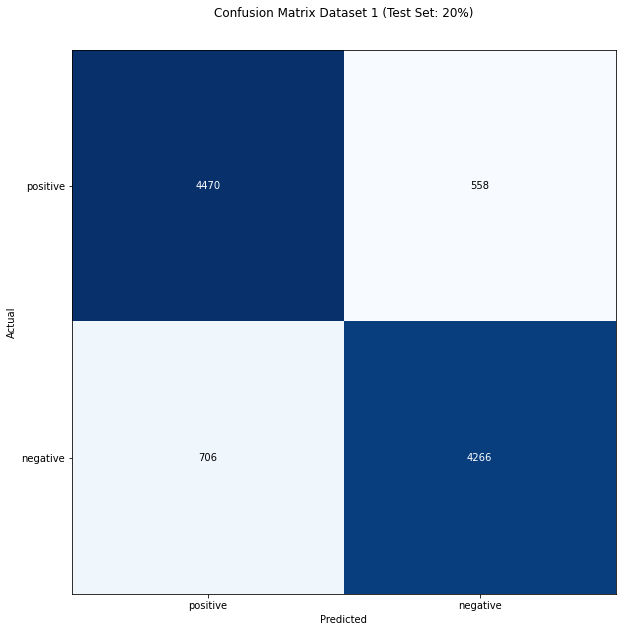

In [38]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

labels = ['positive', 'negative']


cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.title('Confusion Matrix Dataset 1 (Test Set: 20%)')
fig.set_size_inches(10,10)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()